<a href="https://colab.research.google.com/github/Mjcherono/TrialProjects/blob/main/Python_Programming_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Lasso Regression

## Examples

### Example 1

In [1]:
# Example 1
# ---
# This is a simple implementation of the lasso regression
# ---
#

# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [35]:
# Loading our dataset
# 
boston = load_boston()
X = boston.data
y = boston.target

In [36]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [37]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients, 
# with higher values of α creating simpler modelers. The ideal value of α
# should be tuned like any other hyperparameter. In scikit-learn, α
# is set using the alpha parameter.
# 

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.5)

# Fitting the linear regression
regr.fit(X_std, y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Example 2

In [ ]:
# Example 2
# ---
# Predicting the price using the available attributes while performing lasso regression.
# ---
# Dataset url = http://bit.ly/DiamondsDataset
# ---
# 

In [6]:
# Import libraries
# 
import numpy as np
import pandas as pd

In [7]:
# Uploading the dataset
#
diamonds = pd.read_csv('http://bit.ly/DiamondsDataset')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# Droping the index
#
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Printing unique values of text features
# 
print(diamonds.cut.unique())
print(diamonds.clarity.unique())
print(diamonds.color.unique())

# As we can see, there are a finite number of variables, so we can transform these categorical variables to numerical variables.

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [10]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.8850606039595762
lasso MSE: 1829298.9194159876
lasso coef: [ 5159.45245224  -217.84225841  -207.20956411 -1250.0126333
    16.16031486    -0.           496.17780105    72.11296318
  -451.28351376]


In [13]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 1.8000000000000003}
lasso score: 0.8864028207282029
linear score: 0.8859249267960946
lasso MSE: 1804825.7372966239
linear MSE: 1812418.4898094584
lasso best estimator coef: [ 5081.13719385  -206.74219417  -206.76740591 -1189.71741405
    34.20443271    -0.           501.07193561    73.6968175
  -456.5137409 ]
linear coef: [[ 5155.92874335  -208.70209498  -208.16287626 -1439.0942139
    243.82503796   -28.79983655   501.31962765    73.93030707
   -459.94636759]]


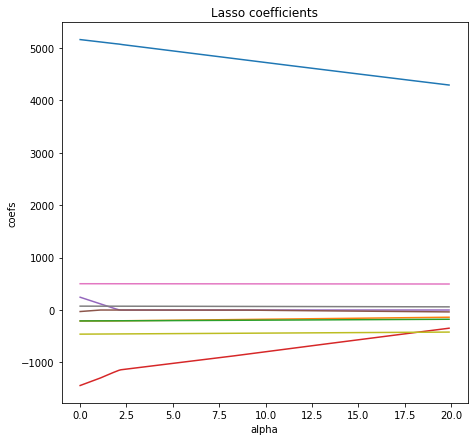

In [14]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

## <font color="green">Challenges</font>

### <font color="green">Challenge 1</font>

######1.Split into x and y
######2.Standardize features
######3.Fitting Lasso regression
######4.  

In [72]:
# Challenge 1
# ---
# Question: Predict house sales prices for King County given the following dataset applying lasso regression.
# ---
# Dataset url = http://bit.ly/KCHouseDataset
# ---
# 
prices = pd.read_csv('http://bit.ly/KCHouseDataset')
prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [73]:
prices.drop(['id','date'],axis=1, inplace=True)

In [74]:
prices.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
X = prices.drop(['price'],1)
y = prices.price

In [76]:
prices.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [77]:
#Standardizing features the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6997471886987014
lasso MSE: 40466915599.57182
lasso coef: [-33263.15273389  31680.51058161 259260.04293269   5323.23342801
   3611.9416084   50434.18482215  40515.06659262  17168.78282531
 112715.26996002 -83679.32618195 -58497.68748628 -76961.22619304
   7957.38193644 -31159.14189821  83515.69911077 -30236.8334818
  14853.8664779  -10444.69119583]


In [79]:
#Building the lasso model then choosing he riht regularization parameters using grid search  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 20.0}
lasso score: 0.709758484084013
linear score: 0.7097583909084055
lasso MSE: 41146932585.11318
linear MSE: 41146945794.424126
lasso best estimator coef: [-34377.82381281  27807.65560114 213661.81089623   5855.48528401
   6135.33041175  47867.40046375  39637.27299825  18913.5389457
 113014.21049898 -42907.41668449 -37130.82673773 -76912.58105216
   7044.69645612 -31406.16248841  83471.85104942 -30521.66008357
  16665.36511201  -9758.67530143]
linear coef: [-34403.09110911  27938.17699352  81445.7482623    5917.74964169
   6140.12900465  47881.47924121  39635.685636    18934.85967512
 112961.4171129   76172.44450276  26493.56815357 -76950.0134622
   7058.57407196 -31456.66094594  83500.30999452 -30571.24281646
  16784.28309364  -9812.32393196]


### <font color="green">Challenge 2</font>

In [ ]:
# Challenge 2
# ---
# Question: Build a regression model to predict sales prices given the following house prices dataset.
# ---
# Dataset source = http://bit.ly/HousePricesDataset
# ---
# 
OUR CODE GOES HERE

### <font color="green">Challenge 3</font>

In [82]:
# Challenge 3
# ---
# Question: Given the following dataset, build a regression model to predict sales.
# ---
# Dataset url = http://bit.ly/AdvertisingDataset
# ---
#
sales = pd.read_csv('http://bit.ly/AdvertisingDataset')
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [83]:
sales.drop(['Unnamed: 0'], axis=1, inplace=True)

In [84]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [85]:
X = sales.iloc[:,0:3]
y = sales.iloc[:,3]

In [86]:
#scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

In [88]:
#calculating the mean squared error

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
MSE

26.17718059036551

In [89]:
#Lasso score

lassoReg.score(X_test,y_test)


0.06490084915413663

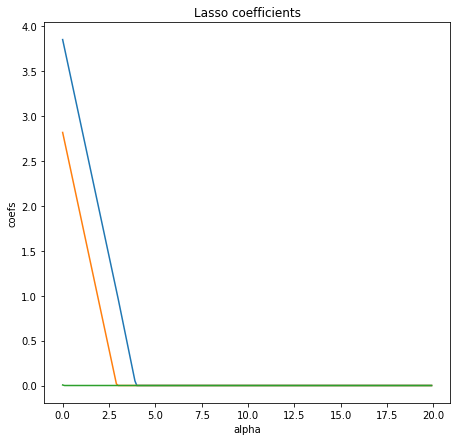

In [90]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

### <font color="green">Challenge 4</font>

In [ ]:
# Challenge 4
# ---
# Question: Build a model to predict time (in seconds) that a car spends on the test bench given a dataset 
# that contains an anonymized set of variables, each representing a custom feature in a Mercedes car.
# ---
# Dataset url = http://bit.ly/MercedesDataset
# ---
# 
OUR CODE GOES HERE

### <font color="green">Challenge 5</font>

In [99]:
# Challenge 5
# ---
# Question: Predict the burned area of forest fires, in the northeast region of Portugal, 
# by using meteorological and other data.
# ---
# Dataset url = http://bit.ly/ForestFiresDatasetSource
# 
forest_fires = pd.read_csv('/content/forestfires.csv',encoding='latin')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [100]:
forest_fires.drop(['month','day'], axis=1, inplace=True)

In [102]:
forest_fires.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [104]:
X = forest_fires.iloc[:,0:10]
y = forest_fires.iloc[:,10]

In [105]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [106]:
forest_fires.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
area    float64
dtype: object

In [107]:
#scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

In [109]:
#Building the lasso model then choosing he riht regularization parameters using grid search  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 10.0}
lasso score: -0.0003075771452658582
linear score: -0.03730103727146128
lasso MSE: 1301.4291025588786
linear MSE: 1349.5586646181596
lasso best estimator coef: [ 0.  0.  0.  0.  0.  0.  0. -0.  0. -0.]
linear coef: [ 4.87290065  1.68479457 -1.16324787  6.79746044 -1.89021894 -2.64769834
  4.00775982 -6.2398836   2.80523244 -0.77102871]


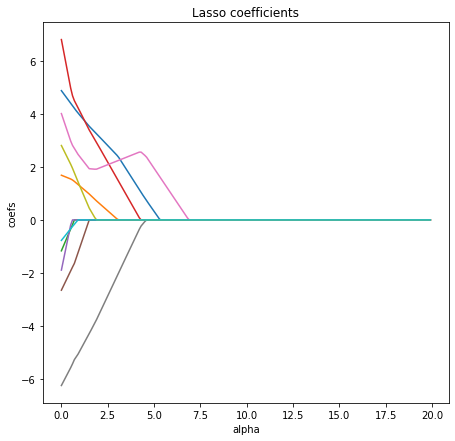

In [110]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable